## Imports and loader funcitons

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import cv2
import numpy as np
import PIL
import os
import re

In [3]:
def imshow(img):
    img = img.astype(np.uint8)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(img).convert("RGB"))
    
def imshow_on_axis(img, ax, title):
    img = img.astype(np.uint8)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

            
def load_images_from_path(path, number):
    images = []
    srcs = []
    pattern = rf"^{number}(?!\d)"
    
    for filename in os.listdir(path):
        if re.match(pattern, filename):
            img = cv2.imread(os.path.join(path, filename))
            if img is not None:
                images.append(img)
                srcs.append(filename)

    return images, srcs


def load_images(number):
    final_images = []
    final_srcs = []

    final_path = f"data/final_submissions/{number}/"
    web_path = "data/web/"
    ai_path = "data/ai/"

    if not os.path.exists(final_path):
        print(f"The final submissions path '{final_path}' does not exist.")
        return None, None, None

    for filename in os.listdir(final_path):
        img = cv2.imread(os.path.join(final_path, filename))
        if img is not None:
            final_images.append(img)
            final_srcs.append(f"{number}_{filename}")

    web_images, web_srcs = load_images_from_path(web_path, number)
    ai_images, ai_srcs = load_images_from_path(ai_path, number)

    if not final_images:
        print(f"No images found in '{final_path}'. Please check the contents.")
        return None, None, None

    if not web_images and not ai_images:
        print(
            f"The number '{number}' does not correspond to any valid images in 'web' or 'ai' folders."
        )
        return None, None, None

    if not web_images:
        print(f"No web images found with prefix '{number}' in '{web_path}'.")
        return None, None, None
    if not ai_images:
        print(f"No AI images found with prefix '{number}' in '{ai_path}'.")
        return None, None, None

    return final_images, web_images, ai_images, final_srcs, web_srcs, ai_srcs

In [4]:
def read_csv(path):
    try:
        df = pd.read_csv(path)
        return df
    except Exception as e:
        print(f"Error reading the file: {e}")
        return None

## Analyze of plots

In [37]:
resnets_temp=[]
new_columns = ["Final_Submission", "Inspiration", "Similarity"]

for i in range(1,26):
    resnets_temp.append(read_csv(f"csv/csv2/{i}.csv"))
#Temp fix cause we still dont have all data for 26 group
resnets_temp.append(read_csv(f"csv/csv2/27.csv"))

resnets = pd.concat(resnets_temp, ignore_index=True)
resnets.columns = new_columns
resnets["Final_Submission"] = resnets["Final_Submission"].apply(lambda x: "_".join(x.split('/')[-2:]))
resnets["Inspiration"] = resnets["Inspiration"].apply(lambda x: x.split('/')[-1])


colors = read_csv("csv/color_similarity.csv")

dinos=read_csv("csv/dino_similarity.csv")
dinos.columns = new_columns
dinos["Final_Submission"] = dinos["Final_Submission"].apply(lambda x: "_".join(x.split('\\')[-2:]))
dinos["Inspiration"] = dinos["Inspiration"].apply(lambda x: x.split('\\')[-1])


print(colors.shape)
print(resnets.shape)
print(dinos.shape)

(8620, 3)
(8620, 3)
(8620, 3)


In [38]:
colors.head()

,Final_Submission,Inspiration,Similarity
0,1_1.png,1A_1.jpg,0.622241
1,1_1.png,1A_10.jpg,0.886676
2,1_1.png,1A_2.jpg,0.800207
3,1_1.png,1A_3.jpg,0.775083
4,1_1.png,1A_4.jpg,0.815200


In [7]:
resnets.head()

,Final_Submission,Inspiration,Similarity
0,1_1.png,1A_11.png,0.818425
1,1_1.png,1A_12.png,0.818425
2,1_1.png,1A_13.png,0.826663
3,1_1.png,1B_11.png,0.843834
4,1_1.png,1B_12_1.png,0.812419


In [27]:
dinos.head()

,Final_Submission,Inspiration,Similarity
0,1_8.png,1A_11.png,0.562734
1,1_8.png,1A_12.png,0.562734
2,1_8.png,1A_13.png,0.596446
3,1_8.png,1B_11.png,0.566994
4,1_8.png,1B_12_1.png,0.561020


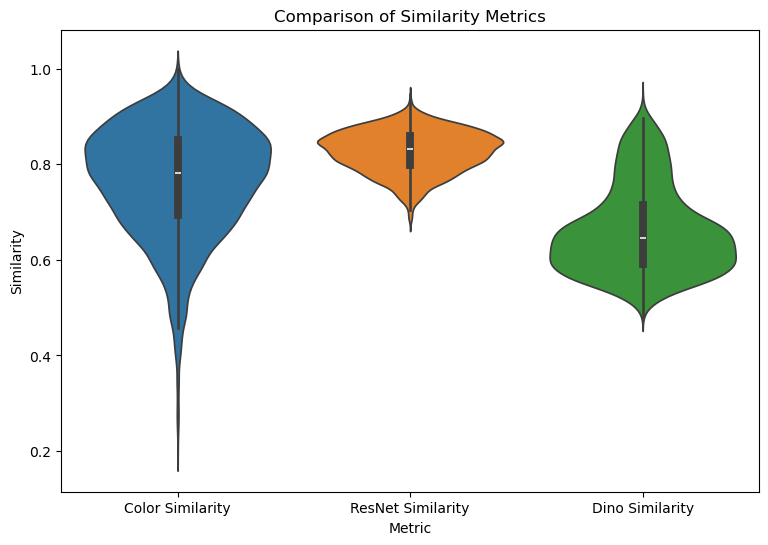

In [32]:
csv_files =[colors, resnets, dinos]
metrics = ["Color Similarity", "ResNet Similarity", "Dino Similarity"]

# Combine each metric into a single DataFrame with a new 'Metric' column
dfs = []
for csv_file, metric in zip(csv_files, metrics):
    df = csv_file.copy()
    df['Metric'] = metric  # Add a column for metric type
    dfs.append(df)

# Concatenate all DataFrames
all_data = pd.concat(dfs, ignore_index=True)

# Plot the violin plot with metric type as hue
#plt.figure(figsize=(7.5, 3*len(csv_files)))
plt.figure(figsize=(3*len(csv_files), 6))
sns.violinplot(data=all_data, x="Metric", y="Similarity", hue="Metric")
plt.title("Comparison of Similarity Metrics")
plt.ylabel("Similarity")
plt.xlabel("Metric")
plt.show()

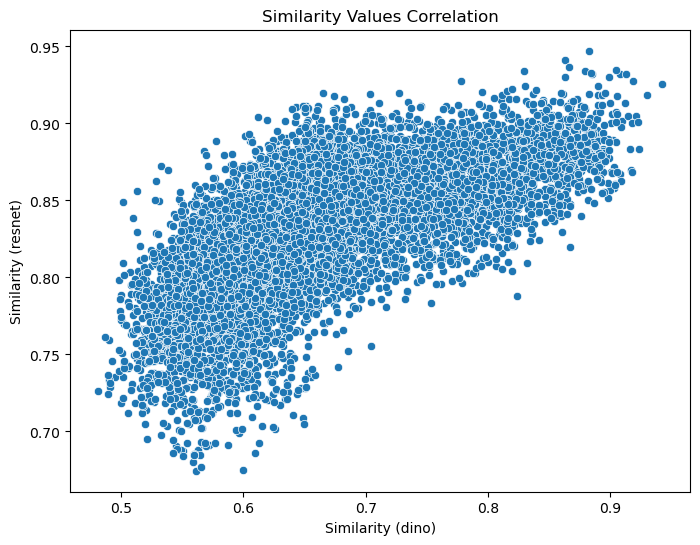

Correlation coefficient: 0.6837753366902171


In [34]:
# Merge the two dataframes on 'Final_Submission' and 'Inspiration'
merged_df = pd.merge(dinos, resnets, on=['Final_Submission', 'Inspiration'], suffixes=('_df1', '_df2'))

# Plot the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Similarity_df1', y='Similarity_df2')
plt.title('Similarity Values Correlation')
plt.xlabel('Similarity (dino)')
plt.ylabel('Similarity (resnet)')
plt.show()

# Compute and print the correlation coefficient
correlation = merged_df['Similarity_df1'].corr(merged_df['Similarity_df2'])
print(f'Correlation coefficient: {correlation}')

## See bar plots of most simmilairty

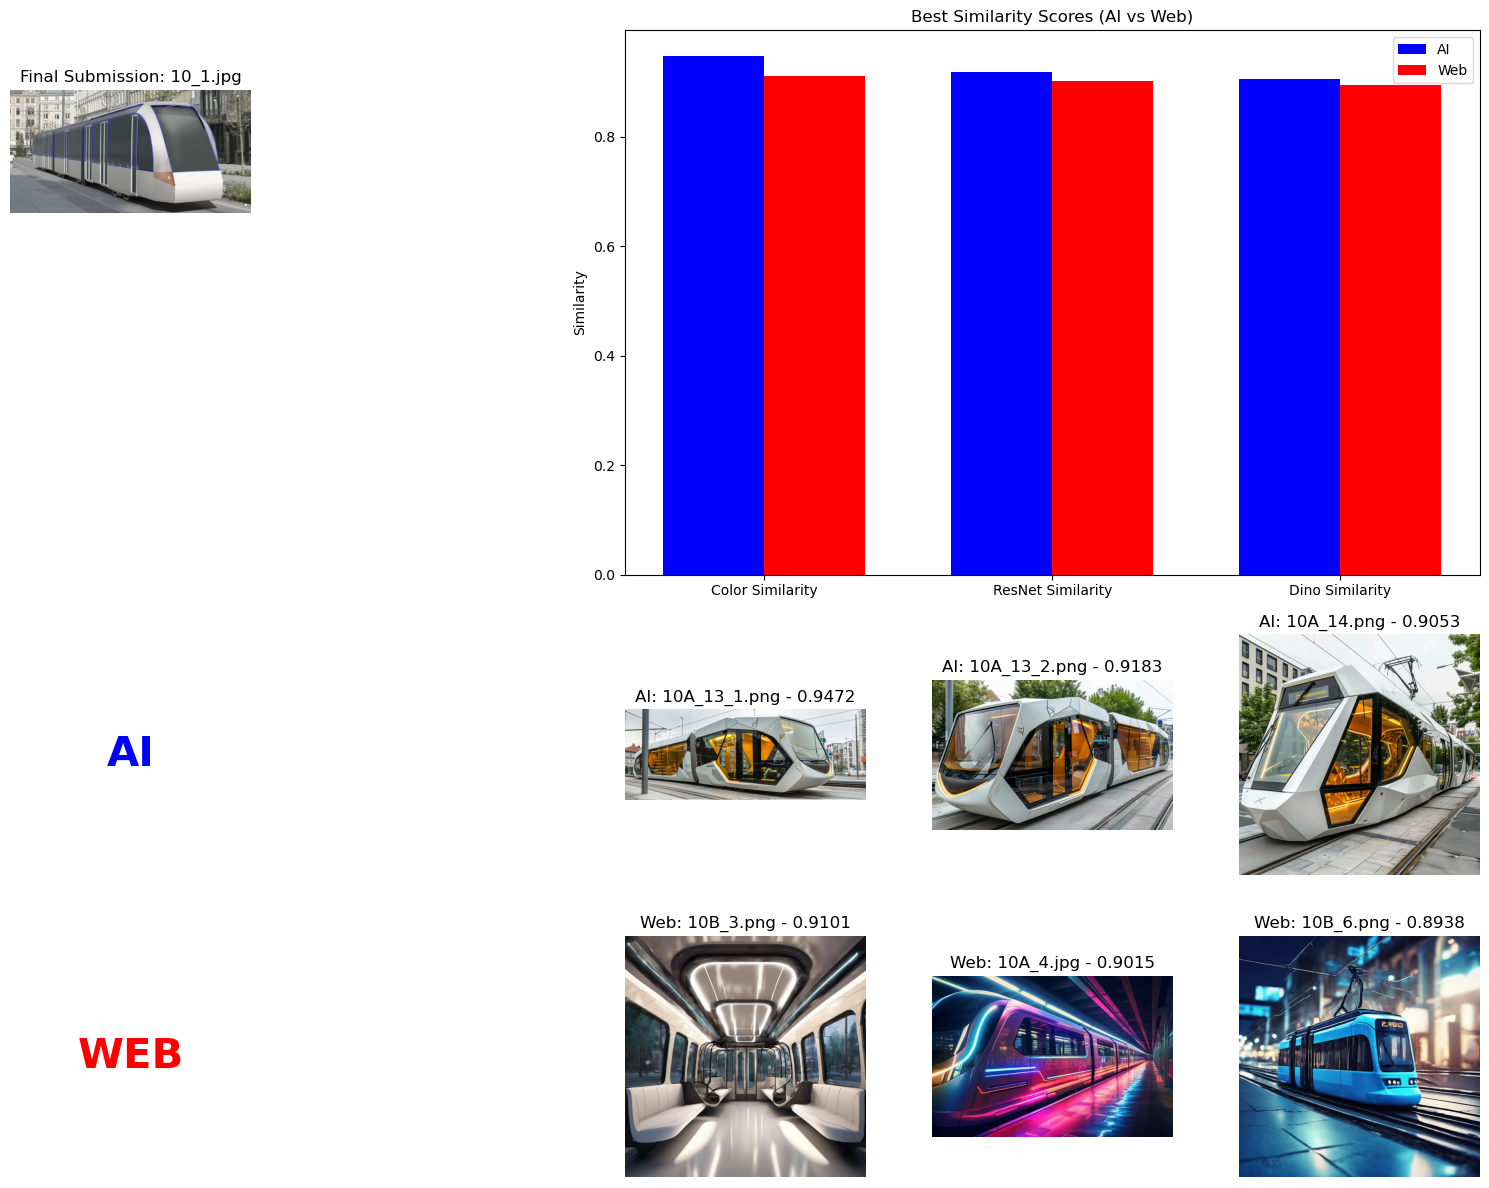

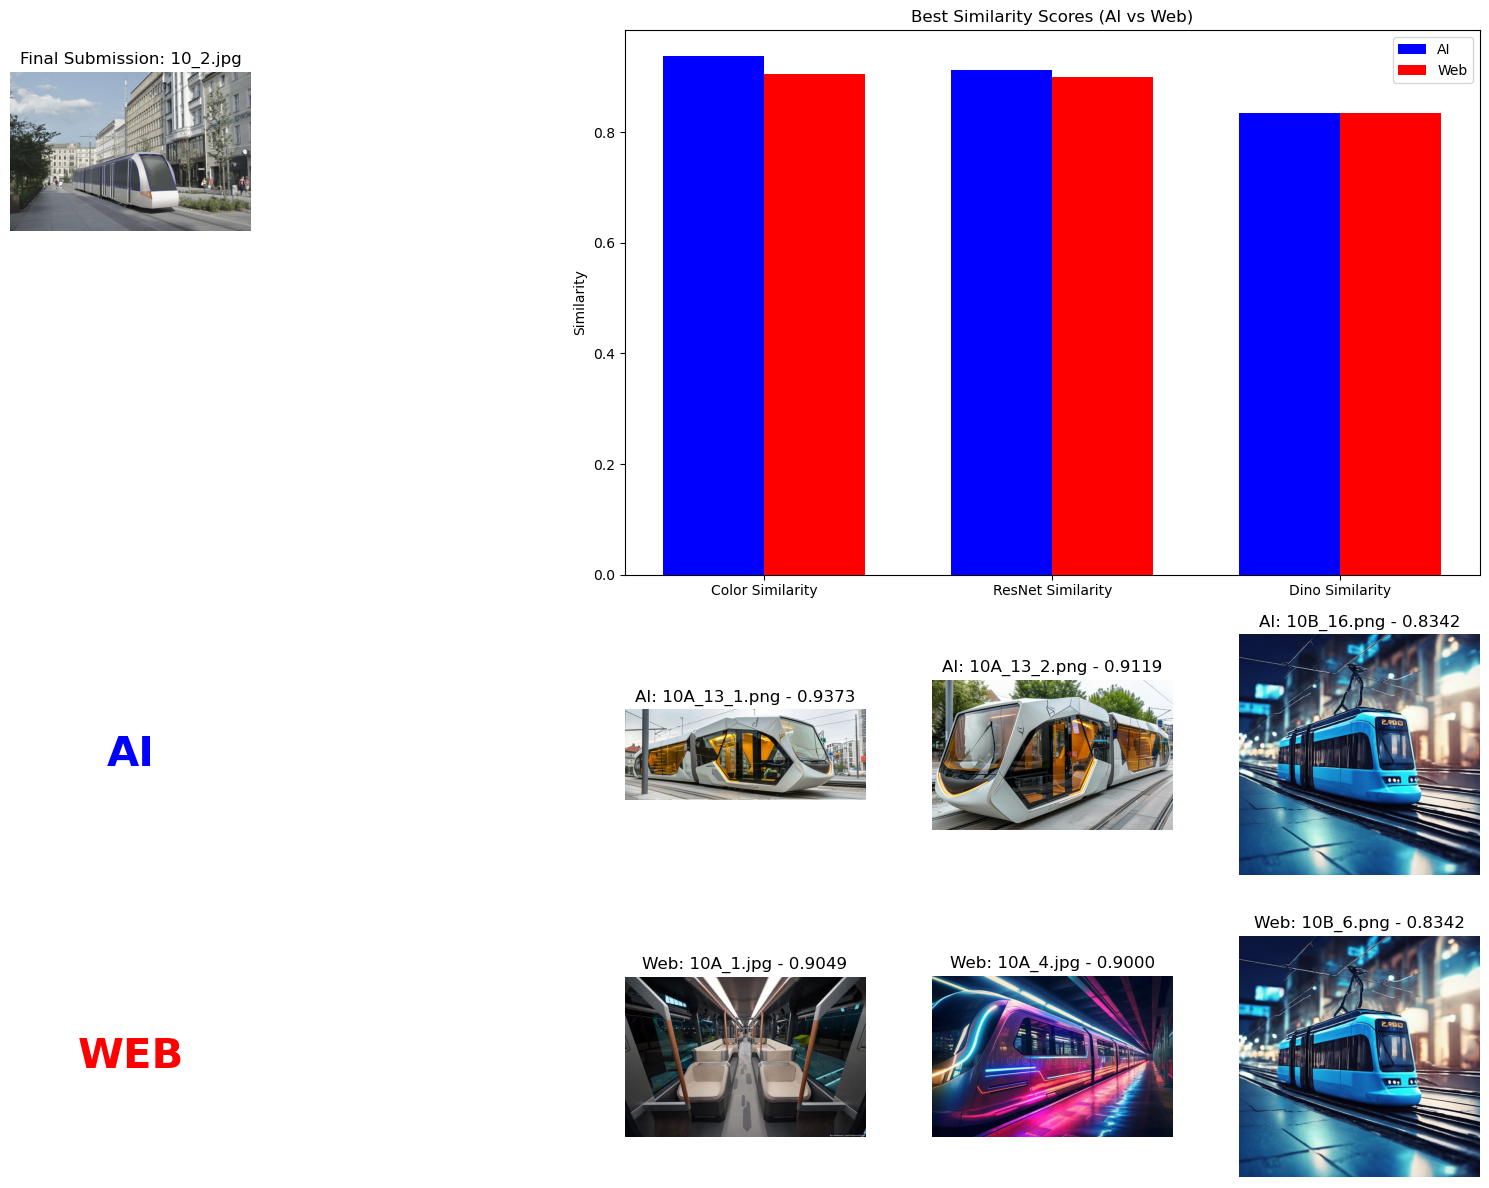

In [64]:
def show_simmilarity(group_id, csv_files):
    final_images, web_images, ai_images, final_srcs, web_srcs, ai_srcs = load_images(group_id)
    
    for i in range (len(final_srcs)):
        final_src = final_srcs[i]
        final_image=final_images[i]
        
        ai_sims=[] #color, resnet, dino
        ai_sims_srcs=[]
        
        web_sims=[]
        web_sims_srcs=[]
        
        for csv_file in csv_files:
            final_df = csv_file[csv_file['Final_Submission'] == final_src]
            
            web_df= final_df[final_df['Inspiration'].isin(web_srcs)]
            web_df= web_df.sort_values(by='Similarity', ascending=False)
            web_sims.append(web_df.iloc[0]['Similarity'])
            web_sims_srcs.append(web_df.iloc[0]['Inspiration'])
            
            ai_df= final_df[final_df['Inspiration'].isin(ai_srcs)]
            ai_df= ai_df.sort_values(by='Similarity', ascending=False)
            ai_sims.append(ai_df.iloc[0]['Similarity'])
            ai_sims_srcs.append(ai_df.iloc[0]['Inspiration'])
            

        
        fig = plt.figure(figsize=(15, 15))
        gs = GridSpec(5, 5, figure=fig)


        ax_final_submission = fig.add_subplot(gs[0:1, 0:1])  
        imshow_on_axis(final_image, ax_final_submission, f"Final Submission: {final_src}")
        
        ax = fig.add_subplot(gs[2, 0])  # ax for 3,0
        ax.text(0.5, 0.5, 'AI', fontsize=30, fontweight='bold', ha='center', va='center', color='blue')
        ax.axis('off')
        
        
        ax = fig.add_subplot(gs[3, 0])  # ax for 3,0
        ax.text(0.5, 0.5, 'WEB', fontsize=30, fontweight='bold', ha='center', va='center', color='red')
        ax.axis('off')
        
        for i in range(len(csv_files)):
            web_score = web_sims[i]
            web_image = web_images[web_srcs.index(web_sims_srcs[i])]
            
            ai_score = ai_sims[i]
            ai_image = ai_images[ai_srcs.index(ai_sims_srcs[i])]
            
            ax_web = fig.add_subplot(gs[3, i+2])
            imshow_on_axis(web_image, ax_web, f"Web: {web_sims_srcs[i]} - {web_score:.4f}")
            
            ax_ai = fig.add_subplot(gs[2, i+2])
            imshow_on_axis(ai_image, ax_ai, f"AI: {ai_sims_srcs[i]} - {ai_score:.4f}")
            
            
            
        ax_bar = fig.add_subplot(gs[0:2, 2:5])  
        bar_width = 0.35 
        x = np.arange(3)  


        ax_bar.bar(x - bar_width / 2, ai_sims, bar_width, label='AI', color='blue')
        ax_bar.bar(x + bar_width / 2, web_sims, bar_width, label='Web', color='red')


        ax_bar.set_ylabel("Similarity")
        ax_bar.set_title("Best Similarity Scores (AI vs Web)")
        ax_bar.set_xticks(x)
        ax_bar.set_xticklabels(['Color Similarity', 'ResNet Similarity', 'Dino Similarity'])
        ax_bar.legend()

        plt.tight_layout()
        plt.show()
        
                
            
        
show_simmilarity(10, csv_files)    